# Diagnostic Classfication:

## About Data


* This Dataset contains 1,319 entries and 9 columns.Here is a brief Description:






1.  Age: Integer, ranging from 14 to 103 years.
2. Gender: Integer, 0 for female and 1 for male.
3. Heart rate: Integer, ranging from 20 to 1111 beats per minute.
4. Systolic blood pressure: Integer, ranging from 42 to 223 mm Hg.
5. Diastolic blood pressure: Integer, ranging from 38 to 154 mm Hg.
6. Blood sugar: Float, ranging from 35 to 541 mg/dL.
7. CK-MB: Float, a cardiac marker enzyme, ranging from 0.321 to 300.
8. Troponin: Float, a cardiac marker protein, ranging from 0.001 to 10.3.
9. Result:Categorical,indicating the testresult as either'positive' or 'negative'.



#Problem Statement
Classifiy the result  of Diagnostic based on a wide range of attributes and features. Using a dataset containing Diagnostic details such as Age,Gender, Heart rate, Systolic blood pressure,Diastolic blood pressure,Blood sugar, CK-MB, and more, we aim to develop a machine learning model that accurately estimates the Diagnostic Result of the particular person.

#**1.Importing Libraries**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#**2. Import Dataset**

In [46]:
df=pd.read_csv('/content/drive/MyDrive/My Machine Learning/MY_Classfication/Medicaldataset.csv')

In [47]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


#**3.Data Checks to Perform**


1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of the dataset




In [48]:
# Check Missing values
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [49]:
#Check Duplicates
df.drop_duplicates(inplace=True)

In [50]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [51]:
# Check the number of unique values of each column
df.nunique()

Age                          75
Gender                        2
Heart rate                   79
Systolic blood pressure     116
Diastolic blood pressure     73
Blood sugar                 244
CK-MB                       700
Troponin                    352
Result                        2
dtype: int64

In [52]:
# Check statistics of the dataset
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


# **4.Data Visualization**

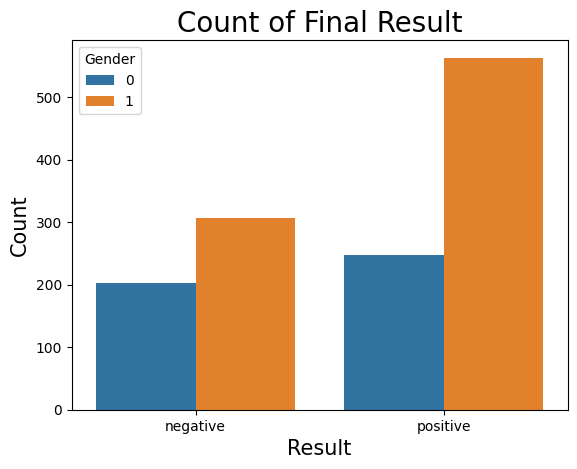

In [53]:
sns.countplot(x ='Result', data = df,hue='Gender')
plt.xlabel('Result',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Count of Final Result',fontsize=20)
plt.show()

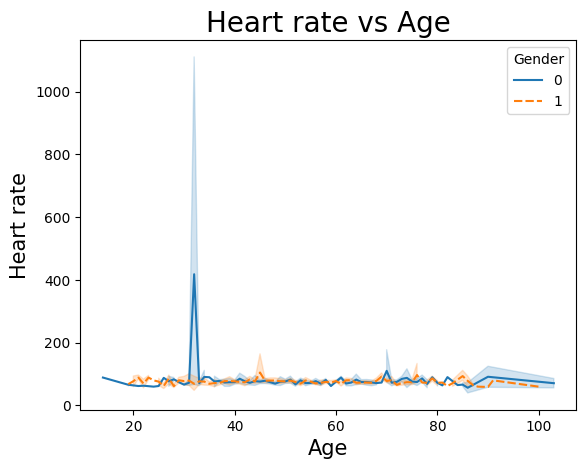

In [54]:
sns.lineplot(x='Age',y='Heart rate',data=df,hue='Gender',style='Gender')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Heart rate',fontsize=15)
plt.title ('Heart rate vs Age',fontsize=20)
plt.show()

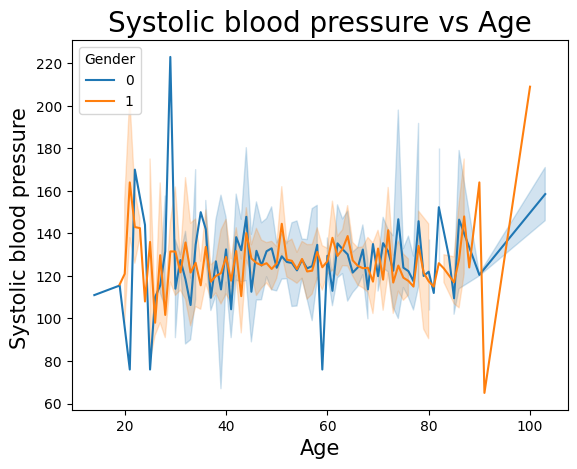

In [55]:
sns.lineplot(x='Age',y='Systolic blood pressure',data=df,hue='Gender')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Systolic blood pressure ',fontsize=15)
plt.title ('Systolic blood pressure vs Age',fontsize=20)
plt.show()

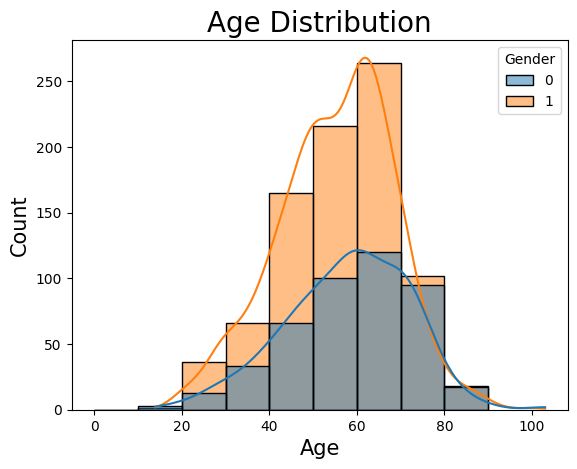

In [56]:
sns.histplot(x='Age', kde = True,bins=[0,10,20,30,40,50,60,70,80,90],hue='Gender',data=df)
plt.title('Age Distribution',fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [57]:
df.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

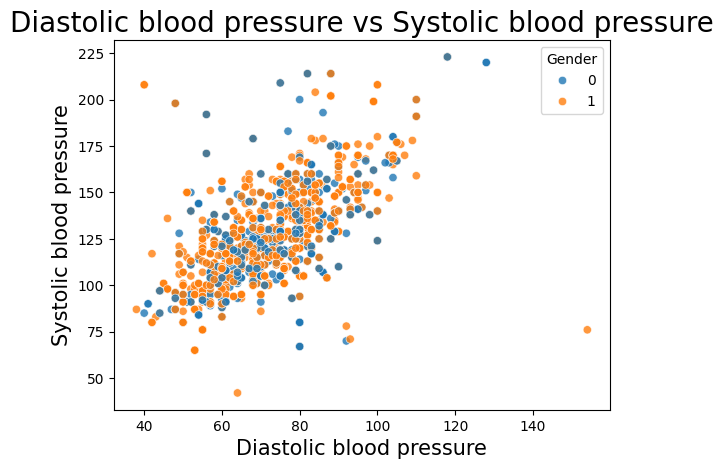

In [58]:
sns.scatterplot(x='Diastolic blood pressure',y='Systolic blood pressure',data=df,hue='Gender',alpha=0.8)
plt.title('Diastolic blood pressure vs Systolic blood pressure',fontsize=20)
plt.xlabel('Diastolic blood pressure',fontsize=15)
plt.ylabel('Systolic blood pressure',fontsize=15)
plt.show()


'Blood sugar', 'CK-MB'

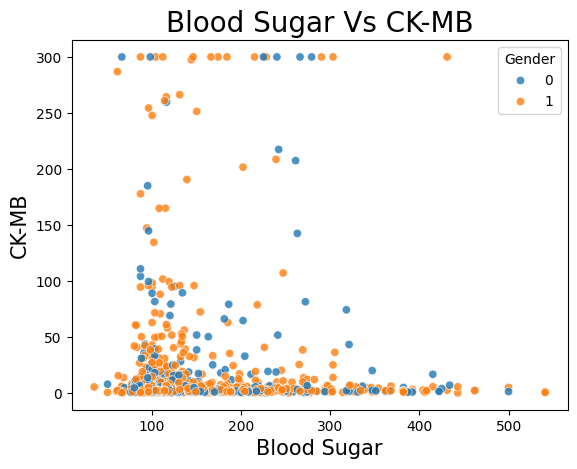

In [59]:
sns.scatterplot(x='Blood sugar',y='CK-MB',data=df,hue='Gender',alpha=0.8)
plt.title('Blood Sugar Vs CK-MB',fontsize=20)
plt.xlabel('Blood Sugar',fontsize=15)
plt.ylabel('CK-MB',fontsize=15)
plt.show()


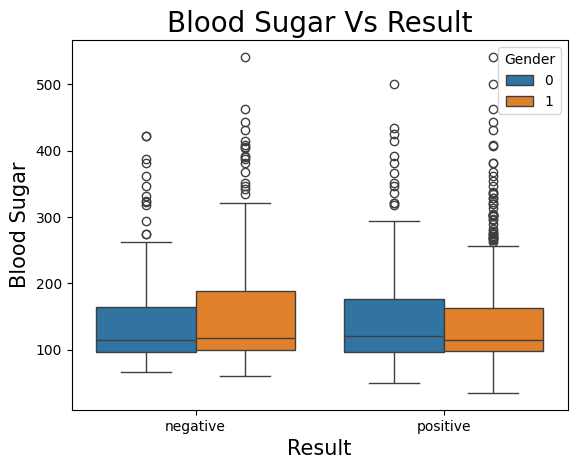

In [60]:
sns.boxplot(x='Result',y='Blood sugar',hue='Gender',data=df)
plt.title('Blood Sugar Vs Result',fontsize=20)
plt.xlabel('Result',fontsize=15)
plt.ylabel('Blood Sugar',fontsize=15)
plt.show()

#**5. Data Pre-Processing**

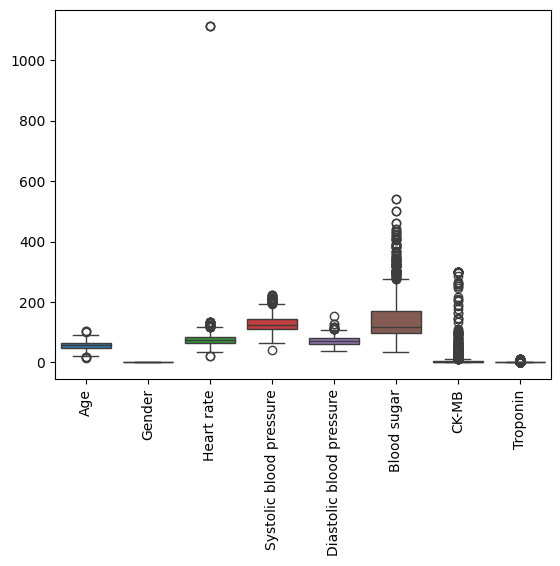

In [61]:
sns.boxplot(df[['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']])
plt.xticks(rotation='vertical')
plt.show()

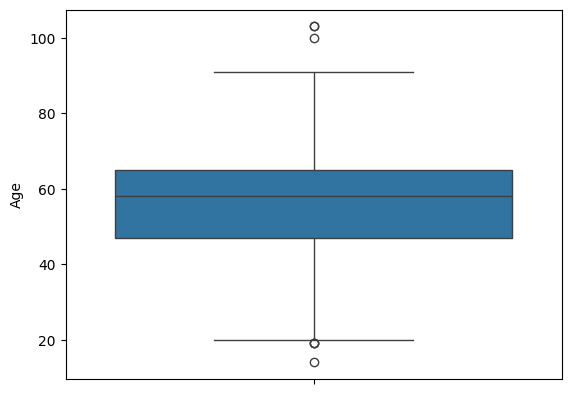

In [62]:
sns.boxplot(df['Age'])
plt.show()

In [63]:
lower_limit=df['Age'].quantile(0.01)
upper_limit=df['Age'].quantile(0.99)
lower_limit,upper_limit

(22.18, 86.0)

In [64]:
outlier_data=df[(df['Age']<lower_limit) | (df['Age']>upper_limit)]


In [65]:
df['Age']=np.where(df['Age']<lower_limit,lower_limit,df['Age'] )
df['Age']=np.where(df['Age']>upper_limit,upper_limit,df['Age'] )

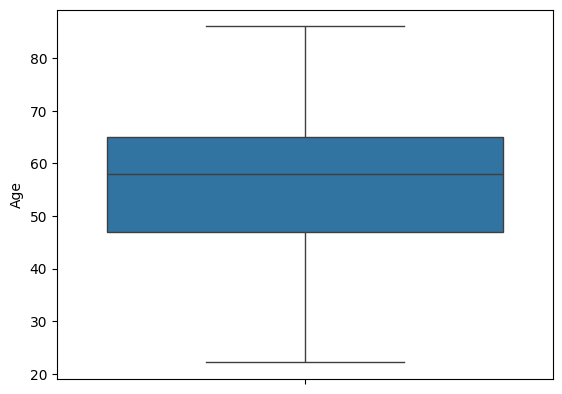

In [66]:
sns.boxplot(df['Age'])
plt.show()

In [67]:
lower_limit_heart=df['Heart rate'].quantile(0.01)
upper_limit_heart=df['Heart rate'].quantile(0.97)
lower_limit_heart,upper_limit_heart

(51.0, 112.0)

In [68]:
out=df[(df['Heart rate']<lower_limit_heart) |(df['Heart rate']>upper_limit_heart)]

In [69]:
df['Heart rate']=np.where(df['Heart rate']<lower_limit_heart,lower_limit_heart,df['Heart rate'])
df['Heart rate']=np.where(df['Heart rate']>upper_limit_heart,upper_limit_heart,df['Heart rate'])

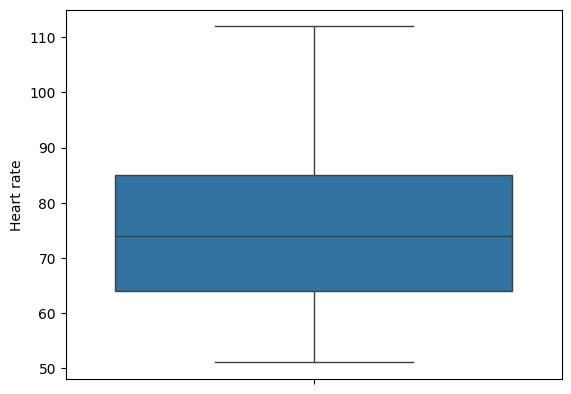

In [70]:
sns.boxplot(df['Heart rate'])
plt.show()

In [71]:
lower_limit_systolic=df['Systolic blood pressure'].quantile(0.1)
upper_limit_systolic=df['Systolic blood pressure'].quantile(0.97)
lower_limit_systolic,upper_limit_systolic

(96.0, 180.0)

In [72]:
df['Systolic blood pressure']=np.where(df['Systolic blood pressure']<lower_limit_systolic,lower_limit_systolic,df['Systolic blood pressure'])
df['Systolic blood pressure']=np.where(df['Systolic blood pressure']>upper_limit_systolic,upper_limit_systolic,df['Systolic blood pressure'])

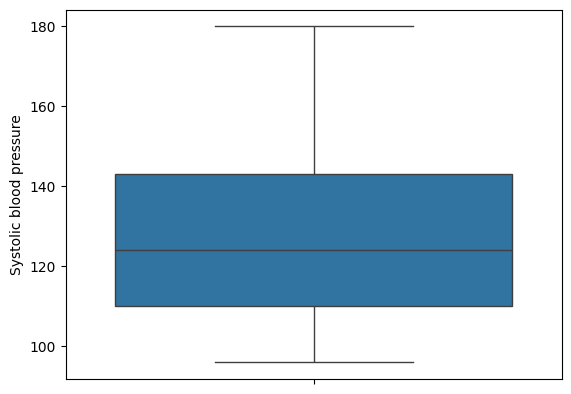

In [73]:
sns.boxplot(df['Systolic blood pressure'])
plt.show()

# **6.Encoding the data**




In [74]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_1=LabelEncoder()
label_2=LabelEncoder()
df['Result']=label_2.fit_transform(df['Result'])

In [75]:
oe=OneHotEncoder()
df['Result']=label_1.fit_transform(df['Result'])

In [76]:
df.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [77]:
x=df[['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']]

In [78]:
y=df['Result']

In [79]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.163397,0.659591,75.913571,127.304018,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.439430,0.474027,14.357038,22.824113,14.033924,74.923045,46.327083,1.154568,0.486991
min,22.180000,0.000000,51.000000,96.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,86.000000,1.000000,112.000000,180.000000,154.000000,541.000000,300.000000,10.300000,1.000000


In [80]:

scaler=StandardScaler()
df=scaler.fit_transform(df)

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,
                                                    random_state=100)

x_train.shape, x_test.shape

((1055, 8), (264, 8))

# **7.Training the model**

In [82]:

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8522727272727273

In [83]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9696969696969697

In [84]:

model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred1=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9696969696969697

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,
                                                    random_state=50
                                               )

x_train.shape, x_test.shape

((923, 8), (396, 8))

In [86]:

from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.797979797979798

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,
                                                    random_state=70
                                               )

x_train.shape, x_test.shape

((923, 8), (396, 8))

In [88]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8863636363636364

In [89]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)


0.6287878787878788

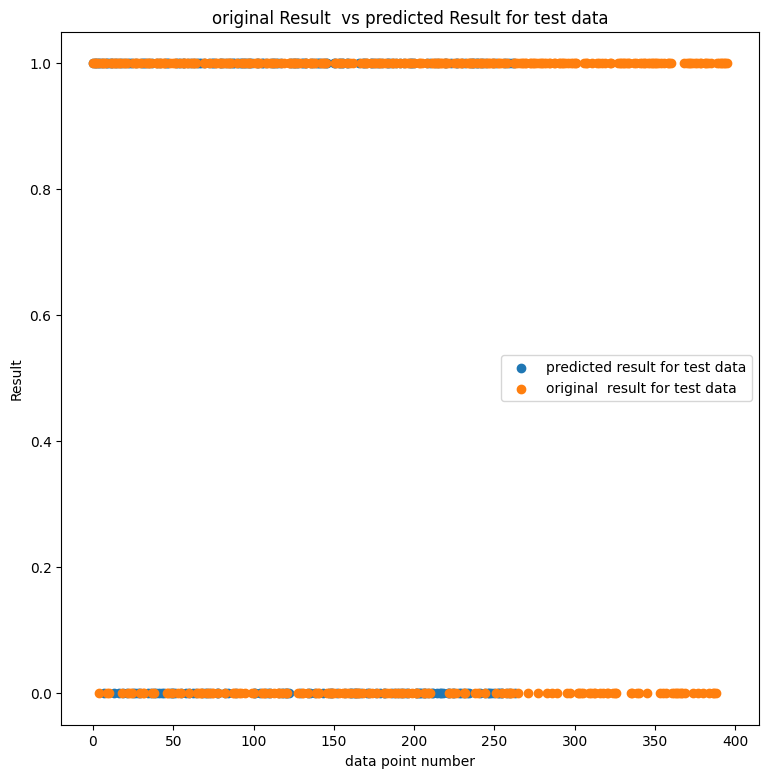

In [91]:
plt.figure(figsize=(9,9))
plt.scatter(range(len(y_pred1)),y_pred1,label='predicted result for test data')
plt.scatter(range(len(y_test)),y_test,label='original  result for test data')
plt.title('original Result  vs predicted Result for test data')
plt.xlabel('data point number')
plt.ylabel('Result')
plt.legend()
plt.show()

# Conclusion: From above graphs, if we ignore few data points, we can say that most of the differences between predicted data points and original data points are lower. So we can use the Random Forest Classifier model for given dataset